<a href="https://colab.research.google.com/github/sergeevayua/yandex-practicum/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тестовое задание




Gnomes are mining gold periodically reporting their bounty. On this mining operation 
there were two generation of tools being used, some gnomes were equipped with 1st generation tools, 
others with 2nd generation. After the introduction of new generation tooling Gnome Inc CEO noticed that 
performance didn’t match his expectations. You as an analyst of Gnome Inc should confirm or reject CEO 
worries supporting your findings by cold hard data.

### Подготовка данных и первый взгляд 

In [1]:
import pandas as pd #импортируем пандас для работы с таблицей
import matplotlib.pyplot as plt # для построения графиков
import seaborn as sns # для построения графиков


In [2]:
gold_mining_data=pd.read_csv('gold_mining_data.csv')

In [3]:
print(gold_mining_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13493 entries, 0 to 13492
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dwarf_id       13493 non-null  int64 
 1   hired_date     13493 non-null  object
 2   reported_date  13493 non-null  object
 3   gold_mined     13493 non-null  int64 
 4   hammer_date    13493 non-null  object
dtypes: int64(2), object(3)
memory usage: 527.2+ KB
None


Пропусков в данных нет, нужно только изменить тип данных для дат. 

In [4]:
def to_date(data,col):
    data[col]=pd.to_datetime(data[col], format='%Y-%m-%d')
to_date(gold_mining_data,'hired_date')
to_date(gold_mining_data,'reported_date')
to_date(gold_mining_data,'hammer_date')


Мы изменили тип данных для дат.
## Распределение количества добытого золота
Наша задача - понять почему CEO подумал, что продуктивность кирок 2-го поколения не соответствует ожиданиями и доказать обратное. Для того чтобы оценить разницу в продуктивности кирок старого и нового поколения, разделим наш датасет на два - с кирками нового и старого поколения и построим гистограммы по количеству добытого золота за все время. 

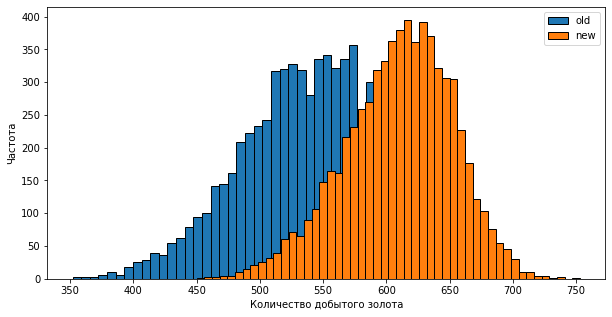

In [5]:
gold_mining_data_1_old=gold_mining_data.loc[gold_mining_data['hammer_date']=='2014-01-01']
gold_mining_data_1_old['dwarf_id'].nunique()
gold_mining_data_2_old=gold_mining_data.loc[gold_mining_data['hammer_date']=='2015-01-01']
gold_mining_data_2_old['dwarf_id'].nunique()
fig, ax = plt.subplots(figsize=(10,5))
gold_mining_data_1_old['gold_mined'].plot(kind='hist', ec='black', bins=50, label='old')
gold_mining_data_2_old['gold_mined'].plot(kind='hist', ec='black', bins=50,label='new')

plt.xlabel('Количество добытого золота')
plt.ylabel('Частота')
plt.legend(['old','new'])



По графику распределения видно, что эффективность кирок второго поколения выше, однако ненамного, пик распределения находится правее по оси Х, значит что в среднем гномы с кирками нового поколения добывают больше золота, чем гномы с кирками старого поколения. Однако, давайте более внимательно посмотрим на наш датасет.

In [6]:
#посмотрим на число гномов в 1-м и 2-м датасете
print(gold_mining_data_1_old['dwarf_id'].nunique())
print(gold_mining_data_2_old['dwarf_id'].nunique())

531
2146


Видно, что число гномов с кирками нового поколения примерно в 4 раза меньше, чем число гномов второго поколения. А добыли золота они немного меньше. 
## Сравнение количества отработанных смен 
Может быть дело в числе "смен" отработаных гномами с кирками разных поколений, скорее всего данных по киркам старого поколения у нас больше. 

In [7]:
print('Среднее количество смен, отработанных гномами с кирками старого поколения: ',gold_mining_data_1_old.groupby('dwarf_id')['reported_date'].count().mean())
print('Среднее количество смен, отработанных гномами с кирками нового поколения: ',gold_mining_data_2_old.groupby('dwarf_id')['reported_date'].count().mean())


Среднее количество смен, отработанных гномами с кирками старого поколения:  12.76271186440678
Среднее количество смен, отработанных гномами с кирками нового поколения:  3.1295433364398884


Логично, что гномы с кирками старого поколения добыли так много золота, ведь среднее количество отработанных ими смен равно 12,7, а данных по гномам с кирками нового поколения значительно меньше - у них среднее количество отработанных смен - 3,13. Посмоторим на столбец 'reported_date' внимательнее. 

In [8]:
print(gold_mining_data.head())

   dwarf_id hired_date reported_date  gold_mined hammer_date
0         1 2014-01-01    2014-01-31         656  2014-01-01
1         1 2014-01-01    2014-02-28         565  2014-01-01
2         1 2014-01-01    2014-03-31         516  2014-01-01
3         1 2014-01-01    2014-04-30         568  2014-01-01
4         1 2014-01-01    2014-05-31         556  2014-01-01



Можно заметить, что у гнома неизменна hired_date и разные reported_date, получается каждый гном примерно раз в месяц отчитывается о количестве добытого золота.Посмотрим на первые 40 строк,  чтобы проверить продолжается ли эта тенденция для второго гнома. Так как gold_mined не сильно меняется, то становится понятно, что каждый месяц счетчик по сути обнуляется и тогда становится понятно, что это количество добытого золота не за весь период работы reported_date-hired_date, а за последний месяц. 


In [9]:
print(gold_mining_data.head(40))

    dwarf_id hired_date reported_date  gold_mined hammer_date
0          1 2014-01-01    2014-01-31         656  2014-01-01
1          1 2014-01-01    2014-02-28         565  2014-01-01
2          1 2014-01-01    2014-03-31         516  2014-01-01
3          1 2014-01-01    2014-04-30         568  2014-01-01
4          1 2014-01-01    2014-05-31         556  2014-01-01
5          1 2014-01-01    2014-06-30         565  2014-01-01
6          1 2014-01-01    2014-07-31         512  2014-01-01
7          1 2014-01-01    2014-08-31         547  2014-01-01
8          1 2014-01-01    2014-09-30         507  2014-01-01
9          1 2014-01-01    2014-10-31         487  2014-01-01
10         1 2014-01-01    2014-11-30         500  2014-01-01
11         1 2014-01-01    2014-12-31         485  2014-01-01
12         1 2014-01-01    2015-01-31         489  2014-01-01
13         1 2014-01-01    2015-02-28         428  2014-01-01
14         1 2014-01-01    2015-03-31         479  2014-01-01
15      

## Преобразование данных - поиск медианного колчества добытого каждым гномом золота

Наше предположение верно, чтобы не хранить данные о каждом месяце работы гнома и том, сколько золота он добыл, можно для каждого гнома оставить только среднее количество добытого золота или медиану. Но для начала посмотрим насколько это будет справедливо сделать и какую метрику лучше выбрать, среднее или медиану. Для этого построим рапределение для всего датасета, если оно нормальное, то стоит выбрать медиану. 

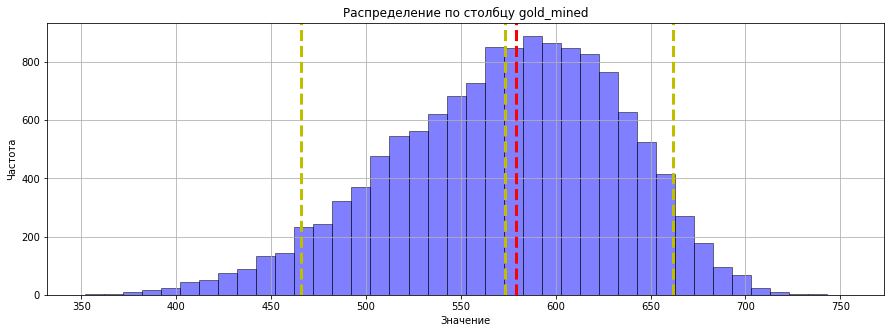

-----------------------------------------------------------


In [10]:

# напишем функцию для построения гистограммы
def my_hist(data,col):# функция для построения гистограммы
    plt.show()
    plt.figure(figsize=(15,5))
    hist=data[col].plot(kind='hist',# гистограмма
                    bins=40,
                    alpha=0.5,
                    ec='black',
                    color='blue')
    plt.axvline(x=data[col].median(),
               linewidth=3,
               color='red',
               linestyle='--')
    plt.axvline(x=data[col].mean(),
               linewidth=3,
               color='y',
               linestyle='--')
    plt.axvline(x=data[col].quantile(.05),
               linewidth=3,
               color='y',
               linestyle='--')
    plt.axvline(x=data[col].quantile(.95),
               linewidth=3,
               color='y',
               linestyle='--')
    plt.title('Распределение по столбцу '+col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
    print('-----------------------------------------------------------')
my_hist(gold_mining_data,'gold_mined')

Распределение нормальное, выбросов нет, значения медианы и среднего отличаются не сильно. Можно взять медиану. 

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
gold_mining_data_temp=pd.DataFrame()#создаем датафрейм для записи туда медианного количества добытого золота
gold_mining_data_temp=gold_mining_data.groupby('dwarf_id')['gold_mined'].median()# записываем в новый датафрейм нужные нам медианные значения для каждого гнома
gold_mining_data_new=gold_mining_data[['dwarf_id','hired_date','reported_date','hammer_date']]# оставляем все столбцы, кроме 'gold_mined', чтобы при merge не возникло gold_mined_x и gold_mined_y
gold_mining_data_new=pd.merge(gold_mining_data_new, gold_mining_data_temp, on='dwarf_id')# соединяем датафреймы по столбцу 'draft_id'
gold_mining_data_new.head()

,dwarf_id,hired_date,reported_date,hammer_date,gold_mined
0,1,2014-01-01,2014-01-31,2014-01-01,502.5
1,1,2014-01-01,2014-02-28,2014-01-01,502.5
2,1,2014-01-01,2014-03-31,2014-01-01,502.5
3,1,2014-01-01,2014-04-30,2014-01-01,502.5
4,1,2014-01-01,2014-05-31,2014-01-01,502.5


У нас получился датафрейм со медианным количеством добытого золота для каждого гнома, но при этом строк для каждого гнома осталость столько же, сколько смен он отработал. Чтобы оставить только по одной строке для каждого гнома со всей нужной нам информацией, создадим датафрейм со столбцом 'draft_id' и максимальной датой в столбце 'reported_date', потом сделаем merge по 'draft_id' с параметром how='inner' и получим датафрейм с данными по каждому гному, в котором будет его id, дата начала работы, дата последнего отчета о добытом зололоте, поколение кирки и медианное количетсво добытого золота за весь период работы. 

In [13]:
gold_mining_data_date=gold_mining_data.groupby('dwarf_id')['reported_date'].max() 

gold_mining_data_new=pd.merge(gold_mining_data_new,gold_mining_data_date, on=['dwarf_id','reported_date'],how='inner')
gold_mining_data_new.head()

,dwarf_id,hired_date,reported_date,hammer_date,gold_mined
0,1,2014-01-01,2015-08-31,2014-01-01,502.5
1,2,2014-01-01,2015-08-31,2014-01-01,501.0
2,3,2014-01-01,2015-08-31,2014-01-01,488.0
3,4,2014-01-01,2015-08-31,2014-01-01,511.0
4,5,2014-01-01,2015-08-31,2014-01-01,504.0


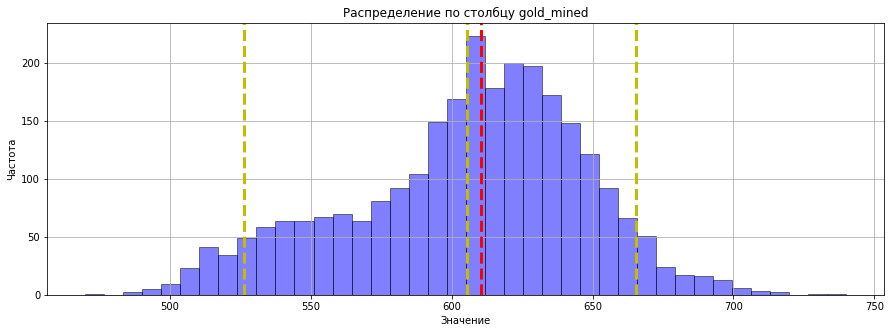

-----------------------------------------------------------


In [14]:
my_hist(gold_mining_data_new,'gold_mined')

Распределение немного изменило свою форму, но осталось нормальным.  Проверим сколько гномов осталось в датасете.

In [15]:
gold_mining_data_1=gold_mining_data_new.loc[gold_mining_data_new['hammer_date']=='2014-01-01']
print(gold_mining_data_1['dwarf_id'].nunique())
gold_mining_data_2=gold_mining_data_new.loc[gold_mining_data_new['hammer_date']=='2015-01-01']
print(gold_mining_data_2['dwarf_id'].nunique())

531
2146


То же количество, что и до преобразования. Посмотрим как изменилось распределение для 1-го и 2-го поколения кирок по числу добытого золота. 

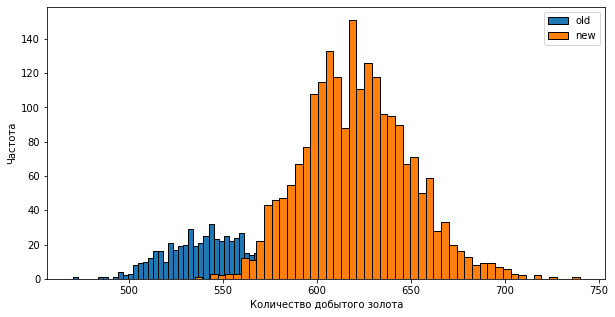

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
gold_mining_data_1['gold_mined'].plot(kind='hist', ec='black', bins=50)
gold_mining_data_2['gold_mined'].plot(kind='hist', ec='black', bins=50)

plt.xlabel('Количество добытого золота')
plt.ylabel('Частота')
plt.legend(['old','new'])



Можно заметить, что количество добытого золота гномами с кирками первого поколения уже с медианным значением, вместо суммарного за весь период наблюдения - значительно меньше. Если сравнить количество суммарно добытого золота за весь периол наблюдений для кирок первого и второго поколения, и количество добытого золота, если брать медианные значения для каждого гнома, то разница будет значительная. 

## Количество добытого золота для кирок разных поколений

In [17]:
print('Количество добытого золота для разных поколений кирок добытого золота за весь период суммарно: ',gold_mining_data.groupby('hammer_date')['gold_mined'].sum())
print('Количество добытого золота для разных поколений кирок если брать только медианные значения по каждому гному: ',gold_mining_data_new.groupby('hammer_date')['gold_mined'].sum())


Количество добытого золота для разных поколений кирок добытого золота за весь период суммарно:  hammer_date
2014-01-01    3640010
2015-01-01    4094482
Name: gold_mined, dtype: int64
Количество добытого золота для разных поколений кирок если брать только медианные значения по каждому гному:  hammer_date
2014-01-01     287335.5
2015-01-01    1333445.0
Name: gold_mined, dtype: float64


Разница значительная, это доказывает, что кирки нового поколения намного более эффективны, но чтобы еще раз в этом убедиться, давайте посчитаем такую величину, которая будет показывать сколько золота добыл гном киркой нового и старого поколения за определенный период времени. Для этого вернемся к датасетам gold_mining_data. 

## Расчет эффективности кирок разных поколений
Возьмем суммарное количество добытого золота и разделим его на количество отработанных месяцев. То есть разделим все добытое золото, на все отработанное время. 

In [18]:
gold_mining_data_temp=pd.DataFrame()#создаем датафрейм для записи туда суммы добытого золота
gold_mining_data_temp=gold_mining_data.groupby('dwarf_id')['gold_mined'].sum()# записываем в новый датафрейм сумму добытого золота за все время работы гнома
gold_mining_data_new=gold_mining_data[['dwarf_id','hired_date','reported_date','hammer_date']]# оставляем все столбцы, кроме 'gold_mined', чтобы при merge не возникло gold_mined_x и gold_mined_y
gold_mining_data_new=pd.merge(gold_mining_data_new, gold_mining_data_temp, on='dwarf_id')# соединяем датафреймы по столбцу 'draft_id'
print(gold_mining_data_new.head())

gold_mining_data_date=gold_mining_data.groupby('dwarf_id')['reported_date'].max() 
gold_mining_data_new=pd.merge(gold_mining_data_new,gold_mining_data_date, on=['dwarf_id','reported_date'],how='inner')
print(gold_mining_data_new.head())


   dwarf_id hired_date reported_date hammer_date  gold_mined
0         1 2014-01-01    2014-01-31  2014-01-01       10072
1         1 2014-01-01    2014-02-28  2014-01-01       10072
2         1 2014-01-01    2014-03-31  2014-01-01       10072
3         1 2014-01-01    2014-04-30  2014-01-01       10072
4         1 2014-01-01    2014-05-31  2014-01-01       10072
   dwarf_id hired_date reported_date hammer_date  gold_mined
0         1 2014-01-01    2015-08-31  2014-01-01       10072
1         2 2014-01-01    2015-08-31  2014-01-01       10065
2         3 2014-01-01    2015-08-31  2014-01-01        9898
3         4 2014-01-01    2015-08-31  2014-01-01       10050
4         5 2014-01-01    2015-08-31  2014-01-01       10136


In [31]:
import numpy as np
gold_mining_data_new['nb_months']=(gold_mining_data_new['reported_date']-gold_mining_data_new['hired_date'])/np.timedelta64(1, 'M')
gold_mining_data_new['nb_months'] = gold_mining_data_new['nb_months'].astype(int)+1# прибавляем 1, так как при вычислениях получается везде на 1 месяц меньше
# из-за того, что в reported_date указывается не 1-е число следующего месяца, а последнее число текущего. 
print(gold_mining_data_new.head())
gold_mining_data_new['efficiency']=gold_mining_data_new['gold_mined']/gold_mining_data_new['nb_months'] 


   dwarf_id hired_date reported_date  ... gold_mined  nb_months  efficiency
0         1 2014-01-01    2015-08-31  ...      10072         20      503.60
1         2 2014-01-01    2015-08-31  ...      10065         20      503.25
2         3 2014-01-01    2015-08-31  ...       9898         20      494.90
3         4 2014-01-01    2015-08-31  ...      10050         20      502.50
4         5 2014-01-01    2015-08-31  ...      10136         20      506.80

[5 rows x 7 columns]


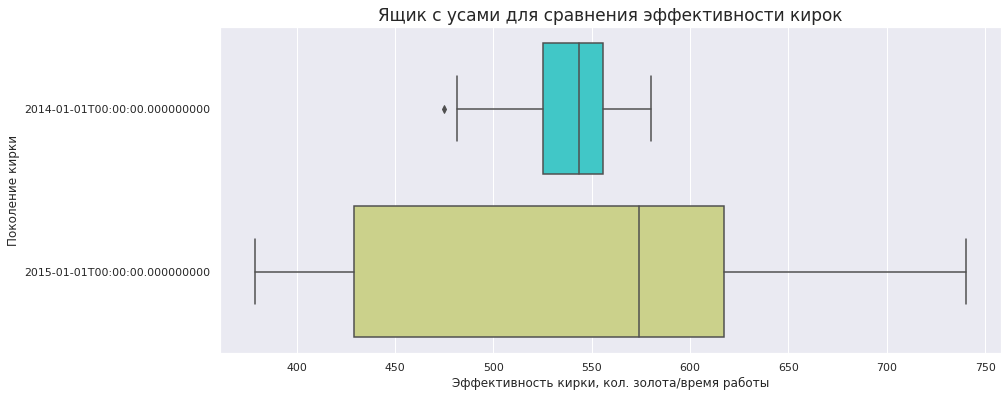

Эффективность кирки старого поколения:  543.3333333333334
Эффективность кирки нового поколения:  574.1875


In [42]:

ax = sns.boxplot(x='efficiency', y='hammer_date', data=gold_mining_data_new, palette="rainbow")
sns.set(rc={'figure.figsize':(14,6)})
plt.title('Ящик с усами для сравнения эффективности кирок',  fontsize=17)
plt.xlabel('Эффективность кирки, кол. золота/время работы', fontsize=12)
plt.ylabel('Поколение кирки', fontsize=12)

plt.show()

print('Эффективность кирки старого поколения: ',gold_mining_data_1['efficiency'].median())
print('Эффективность кирки нового поколения: ',gold_mining_data_2['efficiency'].median())

По ящику с усами видно, что разброс значений для нового поколения больше, чем для старого. Но так же видно, что если смотреть на медиану в этих выборках, то эффективность кирок нового поколения выше, чем эффективность кирок старого поколения. 

## Вывод
Таким образом, проведя исследование можно понять, почему CEO нашей компании усомнился в эффективности кирок нового поколения. Это его заблуждение могло быть вызвано тем, что данных по старым киркам больше и гномы со старыми кирками успели в сумме добыть больше золота, чем гномы c кирками нового поколения. Хоть гномов с кирками нового поколения было больше, они успели сходить на меньшее количество "смен". Не стоит забывать конечно и про то, что гномов с кирками нового поколения у нас почти в 4 раза больше, поэтому ясно, что золота они могли бы добыть больше, даже если работали бы менее эффективно. Для того, чтобы сравнить эффективность работы с кирами разных поколений, я для каждого поколения кирок посчитала величину, показывающую сколько гном добывает золота в месяц в среднем( разделила количество всего добытого гномом золота на количетсво отработанных им месяцев). И этот показатель проиллюстрировал разницу в эффективности киркок. Стало ясно, что кирки нового поколения эффективнее, чем кирки старого. 

P.S. Если честно я сама немного запуталась с этими кирками и гномами, но получилось вот такое исследование. Спасибо за интересное тестовое, буду рада фидбеку по проделанной работе( говорят, что он помогает расти)). Спасибо за уделенное время. 
